# EDA and Preprocessing

In [216]:
library(dplyr)
library(ggplot2)

In [217]:
df <- read.csv("cars_r.csv")

In [218]:
head(df)

X.1,X,symboling,make,fuel.type,body.style,drive.wheels,engine.location,width,height,engine.type,engine.size,horsepower,city.mpg,highway.mpg,price
1,1,3,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
2,2,3,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
3,3,1,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
4,4,2,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
5,5,2,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
6,6,2,audi,gas,sedan,fwd,front,66.3,53.1,ohc,136,110,19,25,15250


## Get rid of unwanted columns

In [219]:
df <- select(df,-c(X.1,X))

In [220]:
head(df)

symboling,make,fuel.type,body.style,drive.wheels,engine.location,width,height,engine.type,engine.size,horsepower,city.mpg,highway.mpg,price
3,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
3,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
1,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
2,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
2,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
2,audi,gas,sedan,fwd,front,66.3,53.1,ohc,136,110,19,25,15250


## Handling missing values

In [221]:
any(is.na(df))

[1] TRUE

In [222]:
for(col in colnames(df)){
    
    if(any(is.na(df[col]))){
        print(col)
    }
}

[1] "width"
[1] "engine.size"


In [223]:
#mean(is.numeric(df$width),na.rm=T)
width.mean <- mean(df$width,na.rm=T)

In [224]:
df$width[is.na(df$width)] <- width.mean

In [225]:
engine.size.mean <- mean(df$engine.size,na.rm=T)

In [226]:
df$engine.size[is.na(df$engine.size)] <- engine.size.mean

In [227]:
any(is.na(df))

[1] FALSE

In [228]:
str(df)

'data.frame':	205 obs. of  14 variables:
 $ symboling      : int  3 3 1 2 2 2 1 1 1 0 ...
 $ make           : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 2 ...
 $ fuel.type      : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ body.style     : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drive.wheels   : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ engine.location: Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ width          : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height         : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ engine.type    : Factor w/ 7 levels "dohc","dohcv",..: 1 1 6 4 4 4 4 4 4 4 ...
 $ engine.size    : num  130 130 152 109 136 136 136 136 131 131 ...
 $ horsepower     : Factor w/ 60 levels "?","100","101",..: 7 7 22 4 10 6 6 6 17 25 ...
 $ city.mpg       : int  21 21 19 24 18 19 19 19 17 16 ...
 $ highway.mpg    : int  27 27 26 30 22 25 25 25 20 2

In [229]:
df$horsepower <- as.numeric(as.character(df$horsepower))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [230]:
horsepower.mean <- mean(df$horsepower,na.rm=T)

In [231]:
df$horsepower[is.na(df$horsepower)] <- horsepower.mean

In [232]:
str(df)

'data.frame':	205 obs. of  14 variables:
 $ symboling      : int  3 3 1 2 2 2 1 1 1 0 ...
 $ make           : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 2 ...
 $ fuel.type      : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ body.style     : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drive.wheels   : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ engine.location: Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ width          : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height         : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ engine.type    : Factor w/ 7 levels "dohc","dohcv",..: 1 1 6 4 4 4 4 4 4 4 ...
 $ engine.size    : num  130 130 152 109 136 136 136 136 131 131 ...
 $ horsepower     : num  111 111 154 102 115 110 110 110 140 160 ...
 $ city.mpg       : int  21 21 19 24 18 19 19 19 17 16 ...
 $ highway.mpg    : int  27 27 26 30 22 25 25 25 20 22 ...
 $ price     

## Handling outliers

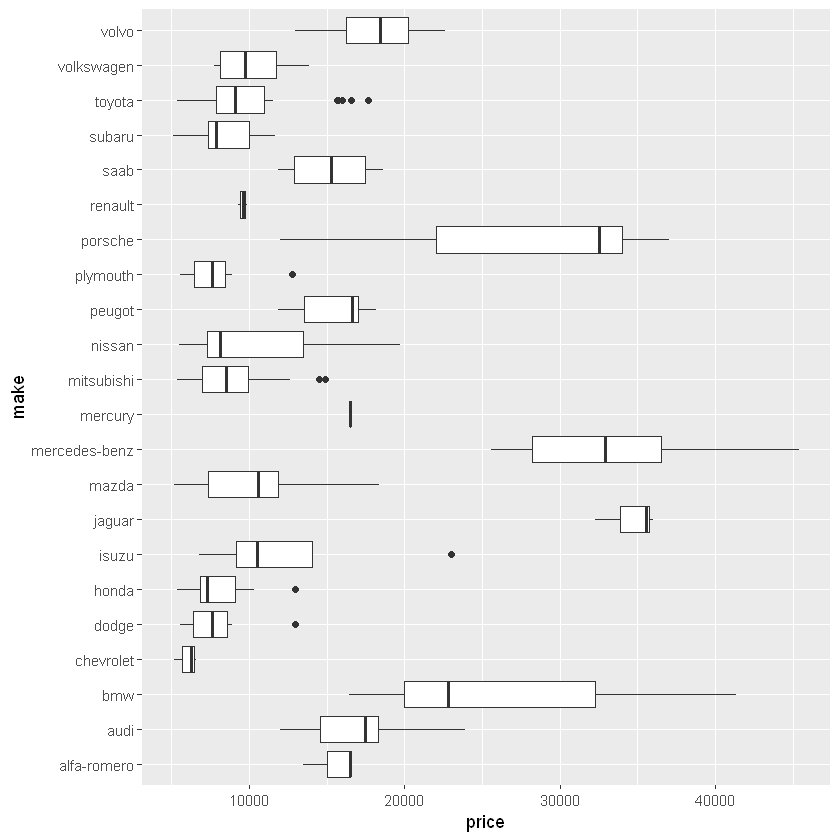

In [233]:
pl <- ggplot(df, aes(make,price))

pl + geom_boxplot() + coord_flip()

In [234]:
df = df[!(df$make=="isuzu" & df$price > 15000),]

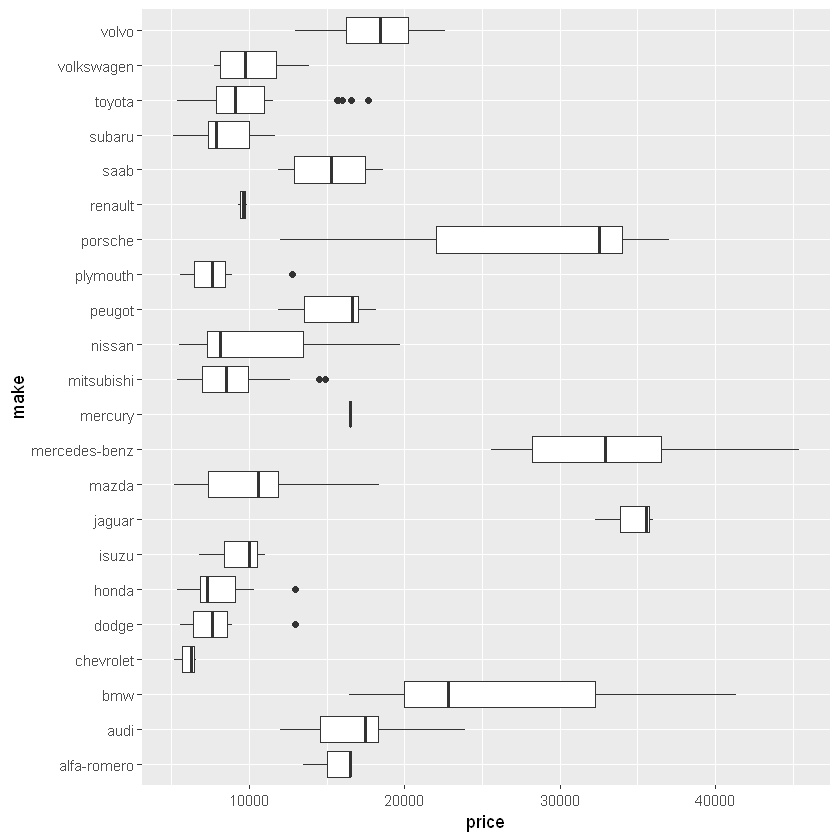

In [235]:
pl <- ggplot(df, aes(make,price))

pl + geom_boxplot() + coord_flip()

## Handling categorical data

In [236]:
df.fact <- sapply(df, is.factor)

In [237]:
df.fact

symboling            make       fuel.type      body.style    drive.wheels 
          FALSE            TRUE            TRUE            TRUE            TRUE 
engine.location           width          height     engine.type     engine.size 
           TRUE           FALSE           FALSE            TRUE           FALSE 
     horsepower        city.mpg     highway.mpg           price 
          FALSE           FALSE           FALSE           FALSE

In [238]:
colnames(df[,df.fact])

[1] "make"            "fuel.type"       "body.style"      "drive.wheels"   
[5] "engine.location" "engine.type"

In [239]:
df$make = as.numeric(df$make)

In [240]:
df$fuel.type = as.numeric(df$fuel.type)

In [243]:
df$body.style = as.numeric(df$body.style)

In [244]:
df$drive.wheels = as.numeric(df$drive.wheels)

In [245]:
df$engine.location = as.numeric(df$engine.location)

In [246]:
df$engine.type = as.numeric(df$engine.type)

In [247]:
head(df)

symboling,make,fuel.type,body.style,drive.wheels,engine.location,width,height,engine.type,engine.size,horsepower,city.mpg,highway.mpg,price
3,1,2,1,3,1,64.1,48.8,1,130,111,21,27,13495
3,1,2,1,3,1,64.1,48.8,1,130,111,21,27,16500
1,1,2,3,3,1,65.5,52.4,6,152,154,19,26,16500
2,2,2,4,2,1,66.2,54.3,4,109,102,24,30,13950
2,2,2,4,1,1,66.4,54.3,4,136,115,18,22,17450
2,2,2,4,2,1,66.3,53.1,4,136,110,19,25,15250


## Scaling data

In [248]:
for (col in colnames(df)){
    df[col] = scale(df[col])
}

In [249]:
head(df)

symboling,make,fuel.type,body.style,drive.wheels,engine.location,width,height,engine.type,engine.size,horsepower,city.mpg,highway.mpg,price
1.7335862,-1.948240,0.3288812,-3.0353672,1.2055495,-0.1218696,-0.8426587,-2.0164656,-2.85116431,0.06943889,0.16629776,-0.6398819,-0.5389066,0.03996687
1.7335862,-1.948240,0.3288812,-3.0353672,1.2055495,-0.1218696,-0.8426587,-2.0164656,-2.85116431,0.06943889,0.16629776,-0.6398819,-0.5389066,0.42072266
0.1297241,-1.948240,0.3288812,-0.7118591,1.2055495,-0.1218696,-0.1834094,-0.5449907,1.87759601,0.59751298,1.25372034,-0.9477496,-0.6849052,0.42072266
0.9316552,-1.788881,0.3288812,0.4498949,-0.5895753,-0.1218696,0.1462152,0.2316210,-0.01390812,-0.43463183,-0.06130231,-0.1780803,-0.1009108,0.09761875
0.9316552,-1.788881,0.3288812,0.4498949,-2.3847001,-0.1218696,0.2403936,0.2316210,-0.01390812,0.21345910,0.26745335,-1.1016834,-1.2688997,0.54109470
0.9316552,-1.788881,0.3288812,0.4498949,-0.5895753,-0.1218696,0.1933044,-0.2588706,-0.01390812,0.21345910,0.14100887,-0.9477496,-0.8309039,0.26233839


## Handling skewness

In [270]:
library(e1071)

In [271]:
df <- read.csv("cars_r.csv")

In [272]:
engine.size.mean <- mean(df$engine.size,na.rm=T)

In [273]:
df$engine.size[is.na(df$engine.size)] <- engine.size.mean

In [274]:
skewness(df$engine.size)

[1] 1.918385

In [277]:
df$engine.size = sqrt(df$engine.size)
#df$engine.size = log(df$engine.size)

In [278]:
skewness(df$engine.size)

[1] 1.085243